In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from matplotlib.pyplot import figure


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/AI/Alteryx Output.xlsx'
dataset = pd.read_excel(file_path)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,INCIDENT_YEAR,INCIDENT_MONTH,INCIDENT_NOM_ARROND,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,...,Feu_de_véhicule_extérieur,Feu_de_véhicule_intérieur,Feu_de_véhicule_sur_pont,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07
0,2016,12,Ahuntsic-Cartierville,3,43,1.228704,126891,66200,0,5,...,0,0,0,0,0,1,0,0,0,0
1,2016,12,Ahuntsic-Cartierville,9,49,0.932468,126891,66200,0,5,...,0,0,0,0,0,0,0,0,0,0
2,2016,12,Ahuntsic-Cartierville,5,42,0.931455,126891,66200,0,5,...,1,0,0,0,0,0,0,0,0,0
3,2016,12,Ahuntsic-Cartierville,4,35,0.911910,126891,66200,0,5,...,0,0,0,0,0,0,0,0,0,0
4,2016,12,Anjou,2,28,1.225944,41928,20250,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# selecting one caserne
onecas = dataset[(dataset['CASERNE'] == 5)]
onecas.head()

,INCIDENT_YEAR,INCIDENT_MONTH,INCIDENT_NOM_ARROND,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,...,Feu_de_véhicule_extérieur,Feu_de_véhicule_intérieur,Feu_de_véhicule_sur_pont,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07
50,2016,12,Ville-Marie,7,5,0.722237,84013,78743,0,0,...,1,0,0,0,0,0,0,0,0,0
111,2011,11,Ville-Marie,9,5,8731.283068,84013,78743,0,69,...,0,0,0,0,0,1,0,0,0,0
172,2019,9,Ville-Marie,1,5,0.561831,84013,78743,0,13,...,0,0,0,0,0,0,0,0,0,0
233,2023,7,Ville-Marie,6,5,0.526741,84013,78743,0,187,...,0,0,0,0,0,0,0,0,0,0
291,2017,3,Ville-Marie,4,5,0.465548,84013,78743,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# creating datetime column
dd = dict(year=dataset.INCIDENT_YEAR, month=dataset.INCIDENT_MONTH, day=1)
onecas['date'] = pd.to_datetime(dd)
onecas.head()

<ipython-input-89-e13b8b58cc0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onecas['date'] = pd.to_datetime(dd)


,INCIDENT_YEAR,INCIDENT_MONTH,INCIDENT_NOM_ARROND,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,...,Feu_de_véhicule_intérieur,Feu_de_véhicule_sur_pont,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07,date
50,2016,12,Ville-Marie,7,5,0.722237,84013,78743,0,0,...,0,0,0,0,0,0,0,0,0,2016-12-01
111,2011,11,Ville-Marie,9,5,8731.283068,84013,78743,0,69,...,0,0,0,0,1,0,0,0,0,2011-11-01
172,2019,9,Ville-Marie,1,5,0.561831,84013,78743,0,13,...,0,0,0,0,0,0,0,0,0,2019-09-01
233,2023,7,Ville-Marie,6,5,0.526741,84013,78743,0,187,...,0,0,0,0,0,0,0,0,0,2023-07-01
291,2017,3,Ville-Marie,4,5,0.465548,84013,78743,0,0,...,0,0,0,0,0,0,0,0,0,2017-03-01


In [ ]:
oc = onecas.sort_values(by = 'date')
o = oc[['date','NUMBER_OF_INCIDENTS']]

# creating a time series from DataFrame
s = o.set_index('date')['NUMBER_OF_INCIDENTS']

split_date = datetime.datetime(2022,1,1)

# creating training and validation
test = s[split_date:]

s = s[:datetime.datetime(2021,12,31)]
s.tail()

date
2021-08-01    13
2021-09-01     4
2021-10-01     6
2021-11-01     8
2021-12-01     5
Name: NUMBER_OF_INCIDENTS, dtype: int64

In [ ]:
# auto ARIMA
%pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

# Automatically determine the best ARIMA model
auto_model = auto_arima(s, seasonal=True, stepwise=True, trace=True, m = 12)

# it returns ARIMA(1,0,0)(1,0,1)[12]

# Print the best model summary
print(auto_model.summary())

# Get the best model's coefficients
best_p, best_d, best_q = auto_model.order
best_P, best_D, best_Q, per = auto_model.seasonal_order
# best_ar_coefs = auto_model.ar_params()
# best_ma_coefs = auto_model.ma_params()

print("Best AR Order (p):", best_p)
print("Best Differencing Order (d):", best_d)
print("Best MA Order (q):", best_q)
# print("Best AR Coefficients:", best_ar_coefs)
# print("Best MA Coefficients:", best_ma_coefs)

# Plot the original data and the best model's fitted values
# plt.plot(s, label='Original Data')
# plt.plot(auto_model.predict_in_sample(), color='red', label='Fitted Values')
# plt.legend()
# plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1213.286, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1191.405, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1195.343, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1506.791, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1199.997, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1190.779, Time=1.28 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1184.549, Time=8.22 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1182.559, Time=3.69 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1193.128, Time=0.68 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1184.532, Time=8.82 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1193.840, Time=2.02 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=9.20 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1188.659, Time=3.58 sec
 ARIMA(2,0,0)(1,0,1)[12] inte

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR Coefficients: [0.23630778]
MA Coefficients: []
                                      SARIMAX Results                                       
Dep. Variable:                  NUMBER_OF_INCIDENTS   No. Observations:                  213
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -600.656
Date:                              Tue, 07 Nov 2023   AIC                           1209.312
Time:                                      05:54:30   BIC                           1222.757
Sample:                                           0   HQIC                          1214.746
                                              - 213                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2363      0.061      3.860     

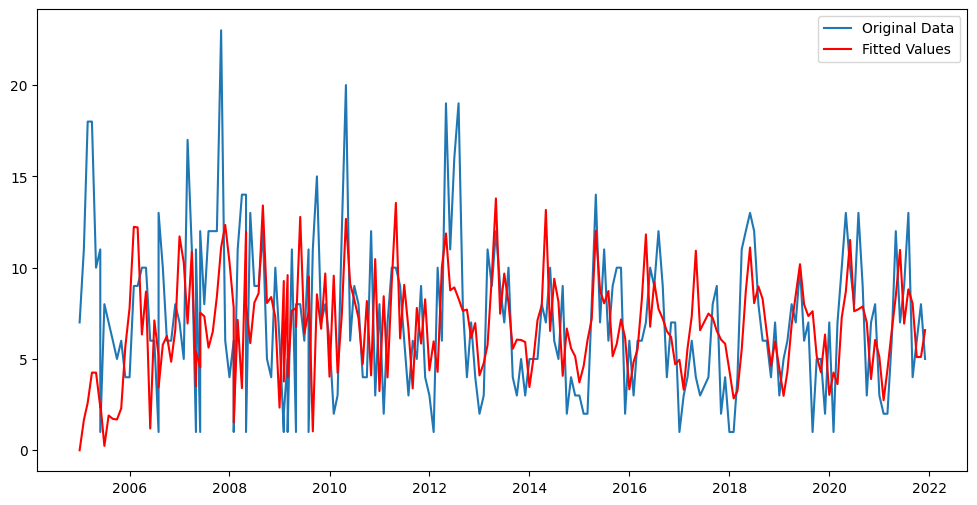

In [ ]:
# Fit an ARIMA model (you should choose appropriate p, d, and q values)
p = best_p
d = best_d
q = best_q

P = best_P
D = best_D
Q = best_Q
per = 12

model = SARIMAX(s, order=(p, d, q),seasonal_order=(P,D,Q,per))
model_fit = model.fit()

# Determine the AR and MA coefficients
ar_coefs = model_fit.arparams
ma_coefs = model_fit.maparams

print("AR Coefficients:", ar_coefs)
print("MA Coefficients:", ma_coefs)

# Print the model summary
print(model_fit.summary())

# Plot the original data and the fitted values
figure(figsize=(12, 6))
plt.plot(s, label='Original Data')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
from dateutil.relativedelta import relativedelta

# ff = model_fit.get_prediction(start='2022-01-01', end='2022-12-01')  # this does not work for some reason
pred_months = 24
ff = model_fit.get_prediction(start=s.shape[0]+1,end=s.shape[0]+pred_months)

start_date = split_date
# end_date = start_date + datetime.timedelta(months=5)
end_date = start_date + relativedelta(months=pred_months-1)

monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')

forecast_ser = pd.Series(data=ff.predicted_mean.values, index=monthly_dates)
forecast_conf_int = ff.conf_int()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


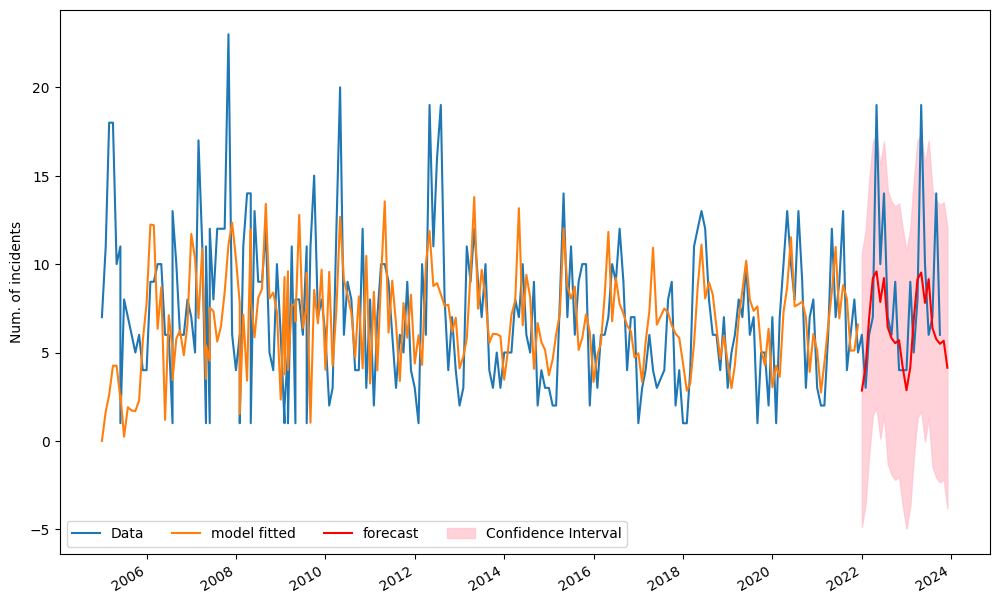

In [ ]:
figure(figsize=(12, 8))
plt.plot(o['date'],o['NUMBER_OF_INCIDENTS'],label = 'Data')
plt.plot(model_fit.fittedvalues, label = 'model fitted')
forecast_ser.plot(color = 'red', label = 'forecast')
plt.fill_between(forecast_ser.index, forecast_conf_int.iloc[:, 0],forecast_conf_int.iloc[:, 1], color='pink', alpha=0.7, label='Confidence Interval')
plt.ylabel('Num. of incidents')
plt.legend(loc="lower left", ncol = 4)